In [2]:
import utils
import shap
import numpy as np
from joblib import dump, load
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

c:\School\repositories\CSCI635\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [4]:
X_background_scaled = shap.sample(X_train_scaled, 50, random_state=34)
X_background = shap.sample(X_train, 50, random_state=34)

In [10]:
knn_model = load('../data/best_knn.joblib')
decision_tree_model = load('../data/best_decision_tree.joblib')
neural_model = load('../data/best_neural_network_no_regs.joblib')

In [6]:
X_sample = X_test[:100]
X_sample_scaled = X_test_scaled[:100]

# Model Metrics

## Decision Tree Metrics

In [7]:
y_pred = decision_tree_model.predict(X_test)

Test Accuracy: 0.9446313778473877
Test MCC: 0.9113298834177245

Confusion Matrix:
[[39962  2165     0     0    44     9   188]
 [ 2249 53782   172     1   268   153    36]
 [    3   113  6748    49     7   231     0]
 [    0     0    47   478     0    24     0]
 [   33   174    16     0  1669     7     0]
 [    2    71   188    27     6  3179     0]
 [  117    34     0     0     0     0  3951]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.94      0.94      0.94      7151
           4       0.86      0.87      0.87       549
           5       0.84      0.88      0.86      1899
           6       0.88      0.92      0.90      3473
           7       0.95      0.96      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.91      0.92      0.92    116203
weighted avg       0.94      0.94   

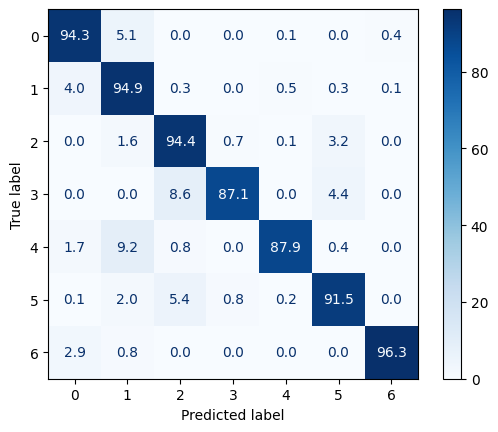

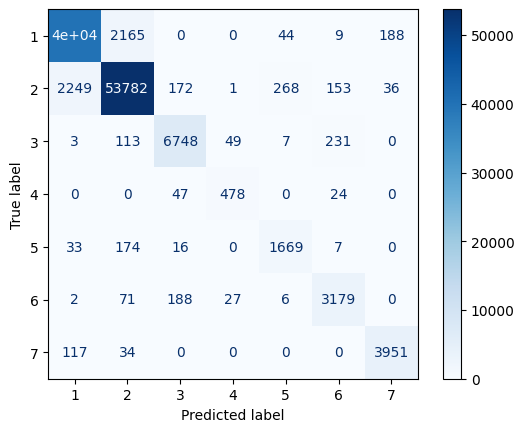

In [8]:
cm = confusion_matrix(y_test, y_pred, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f") 
utils.get_evaluations(y_test, y_pred)

## KNN Metrics

In [13]:
y_pred = knn_model.predict(X_test_scaled)

Test Accuracy: 0.9365076633133396
Test MCC: 0.8980095874682505

Confusion Matrix:
[[39616  2521     5     0    38     9   179]
 [ 2274 53841   156     0   214   155    21]
 [    3   155  6564    56    15   358     0]
 [    0     0    90   427     0    32     0]
 [   41   300    16     0  1525    17     0]
 [    7   146   324    27     7  2962     0]
 [  177    34     0     0     1     0  3890]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.94      0.95      0.95     56661
           3       0.92      0.92      0.92      7151
           4       0.84      0.78      0.81       549
           5       0.85      0.80      0.82      1899
           6       0.84      0.85      0.85      3473
           7       0.95      0.95      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.88      0.89    116203
weighted avg       0.94      0.94   

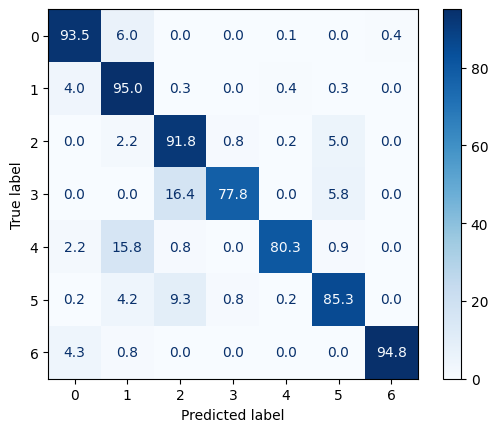

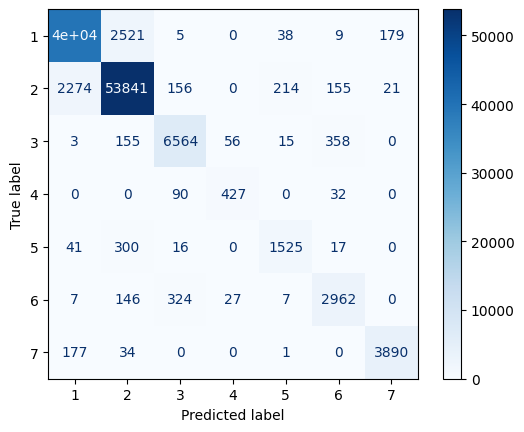

In [14]:
cm = confusion_matrix(y_test, y_pred, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f") 
utils.get_evaluations(y_test, y_pred)

## Neural Network Metrics

In [ ]:
y_pred = neural_model.predict(X_test)
y_pred_idx = [np.argmax(row) for row in y_pred]

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [27]:
y_test_sub = y_test - 1

Test Accuracy: 0.9520752476269976
Test MCC: 0.9229770818701454

Confusion Matrix:
[[39981  2226     0     0    39     3   119]
 [ 1587 54729    82     2   163    71    27]
 [    0   114  6750    55    13   219     0]
 [    0     1    43   469     0    36     0]
 [   27   223    14     0  1628     7     0]
 [    5    94   151    15     7  3201     0]
 [  201    25     0     0     0     0  3876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.96      0.94      0.95      7151
           3       0.87      0.85      0.86       549
           4       0.88      0.86      0.87      1899
           5       0.91      0.92      0.91      3473
           6       0.96      0.94      0.95      4102

    accuracy                           0.95    116203
   macro avg       0.93      0.92      0.92    116203
weighted avg       0.95      0.95   

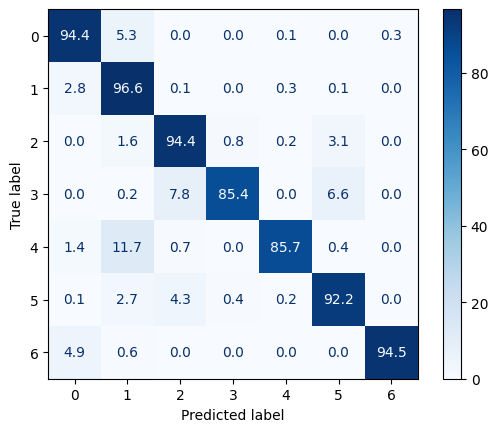

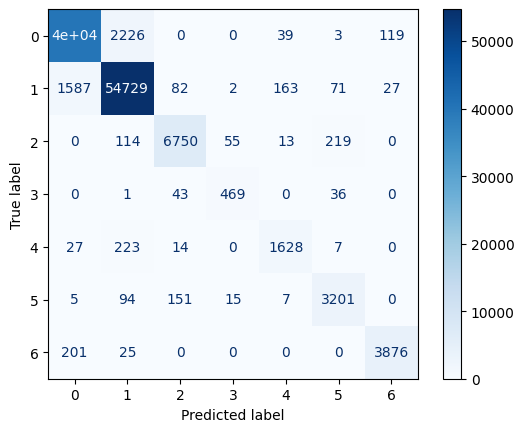

In [29]:
cm = confusion_matrix(y_test_sub, y_pred_idx, normalize='true')  
cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f") 
utils.get_evaluations(y_test_sub, y_pred_idx)

# Interpretibility Through SHAP

## Decision Tree SHAP Interpretibility

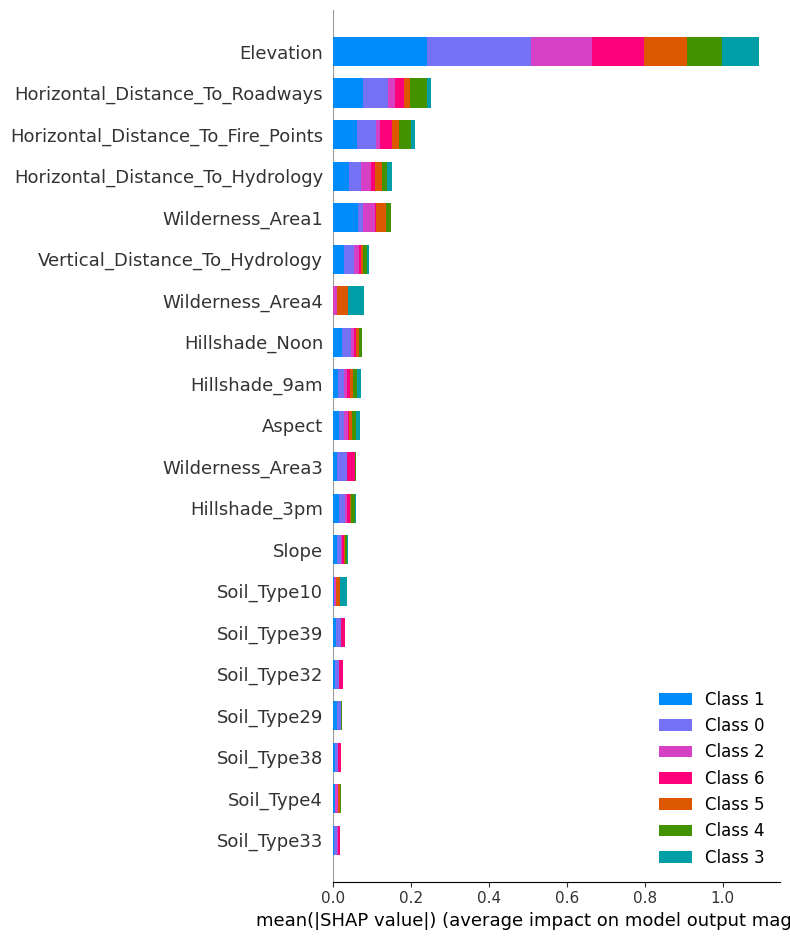

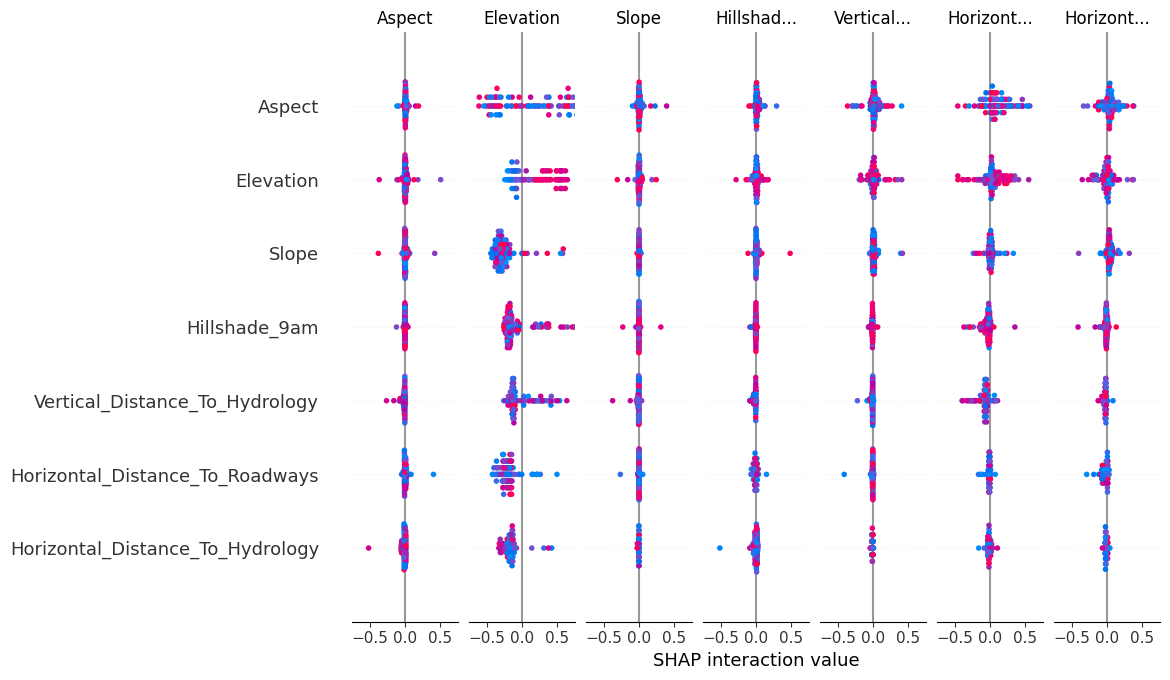

In [10]:
decision_tree_explainer = shap.TreeExplainer(decision_tree_model)

shap_values_tree = decision_tree_explainer.shap_values(X_sample)

shap.summary_plot(
    shap_values_tree, 
    X_sample, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_tree,
    X_sample,
    plot_type="beeswarm"
)

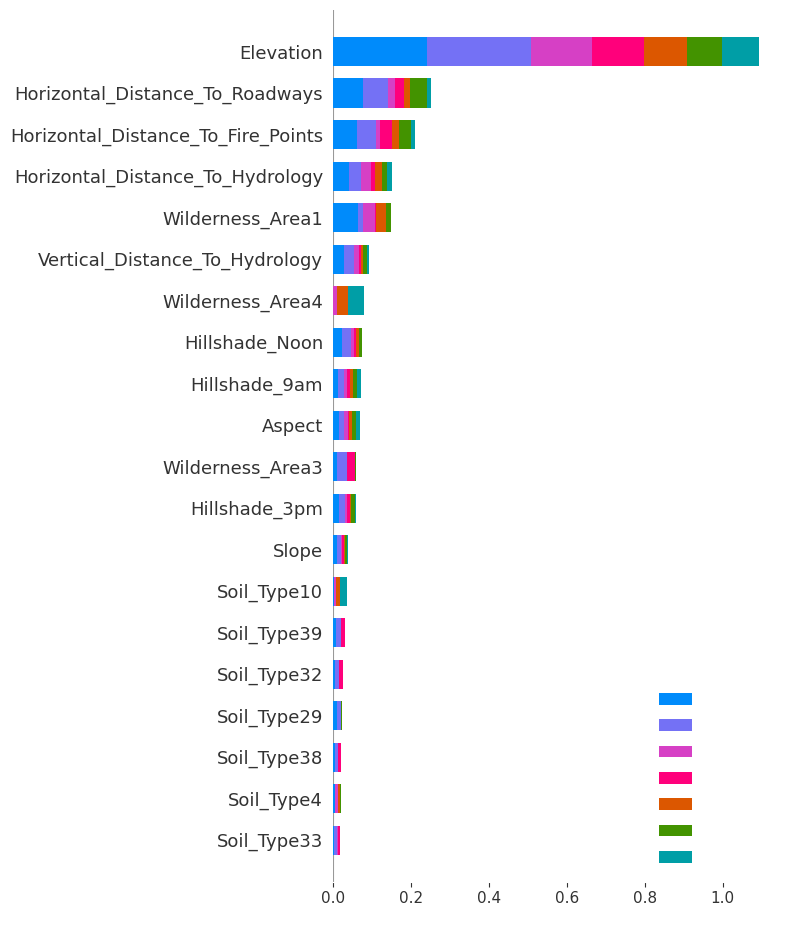

In [21]:
plt.style.use("dark_background")
plt.rcParams['figure.facecolor'] = 'none'       # transparent background
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'

plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# ---- Create the plot ----
plt.figure(figsize=(10, 12))

shap.summary_plot(
    shap_values_tree,
    X_sample_scaled,
    plot_type="bar",
    max_display=20,
    show=False
)

plt.tight_layout()
plt.show()

{'axes.facecolor': 'none', 'boxplot.flierprops.markerfacecolor': 'none', 'boxplot.meanprops.markerfacecolor': 'C2', 'figure.facecolor': 'none', 'legend.facecolor': 'none', 'lines.markerfacecolor': 'auto', 'patch.facecolor': 'none', 'savefig.facecolor': 'none'}


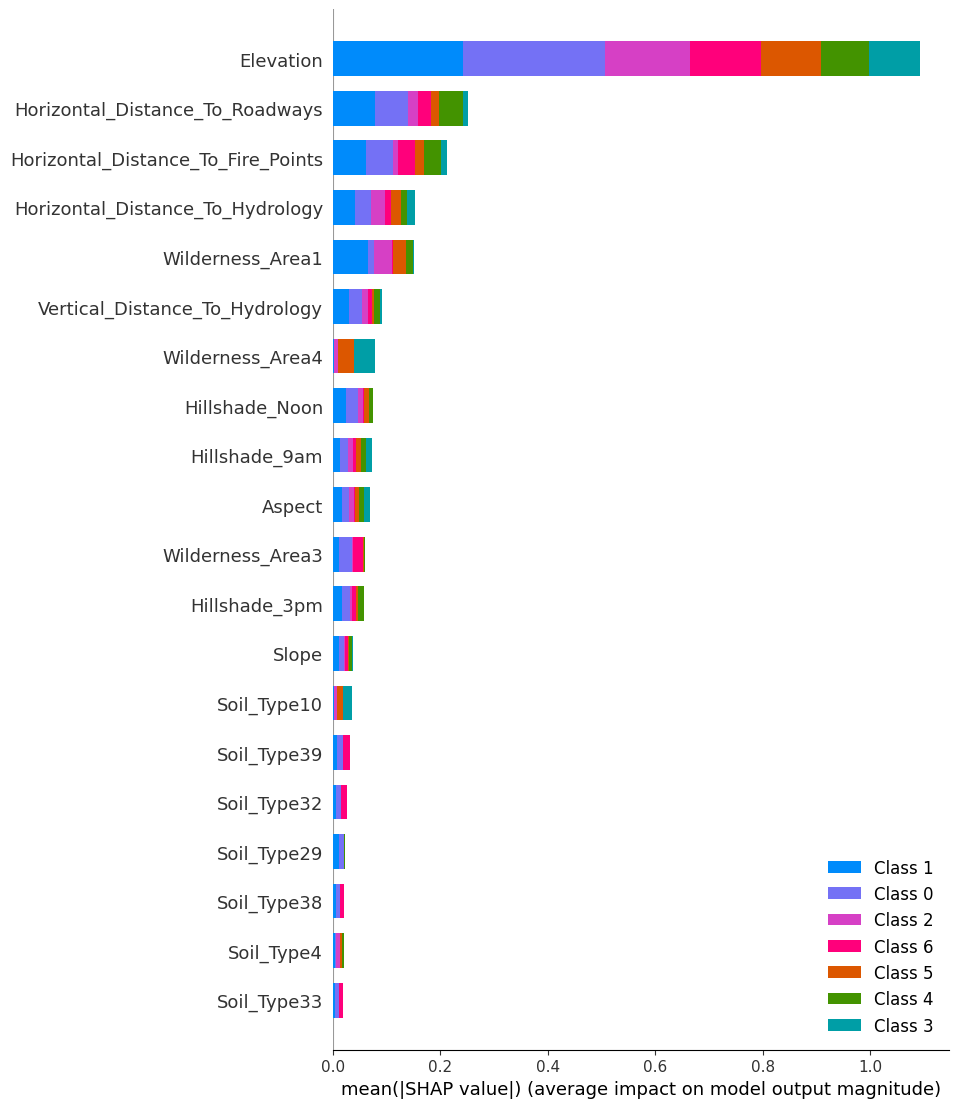

In [20]:
import matplotlib.pyplot as plt
import shap

plt.figure(figsize=(8, 14))   # Taller figure so Y-labels fit
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['patch.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
print({k: v for k, v in plt.rcParams.items() if 'facecolor' in k})

shap.summary_plot(
    shap_values_tree,
    X_sample_scaled,
    plot_type="bar",
    max_display=20,
    show=False
)

plt.tight_layout(pad=-5)  # extra padding to avoid cutoff
plt.show()

## KNN SHAP Interpretibility 

In [ ]:
X_sample_scaled = X_test_scaled[:20]
knn_explainer = shap.KernelExplainer(knn_model.predict_proba, X_sample_scaled)

shap_values_knn = knn_explainer.shap_values(X_sample_scaled, n_samples=100)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
plt.figure(figsize=(10, 6))  # Increase figure size so labels fit
plt.rcParams['savefig.facecolor'] = 'none'   # Transparent background when saving
plt.rcParams['figure.facecolor'] = 'none'    # Transparent background on screen

shap.summary_plot(
    shap_values_knn,
    X_sample_scaled,
    plot_type="bar",
    max_display=X_sample_scaled.shape[1],  # ensure all features show
    show=False  # allow us to modify layout after
)

plt.tight_layout()  # Make text fit nicely
plt.show()

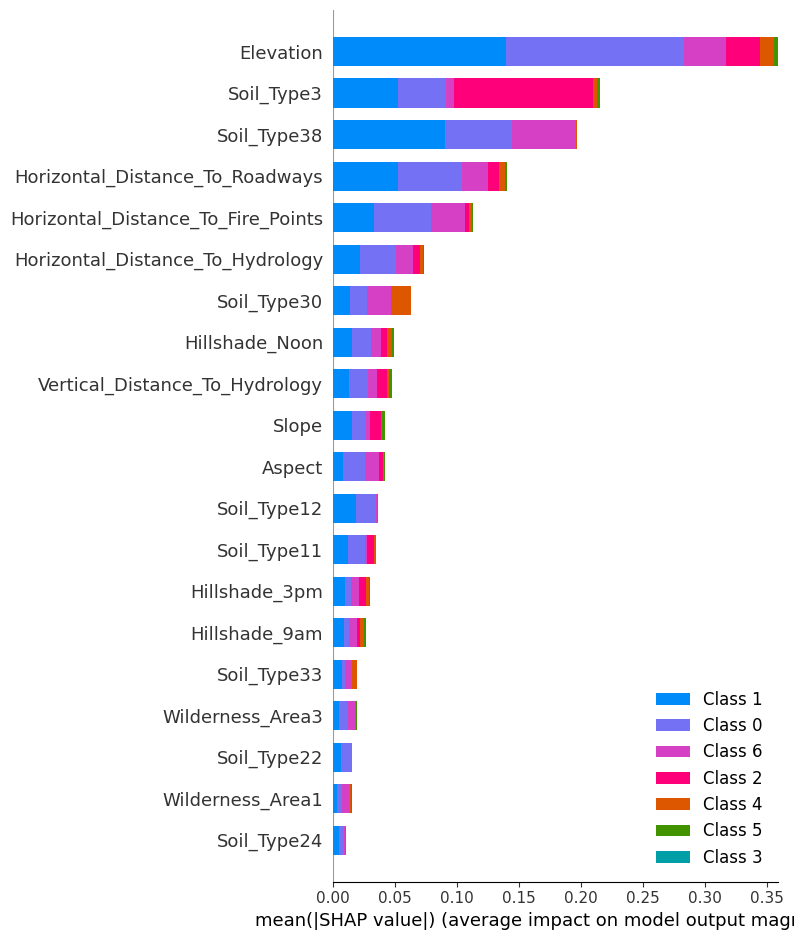

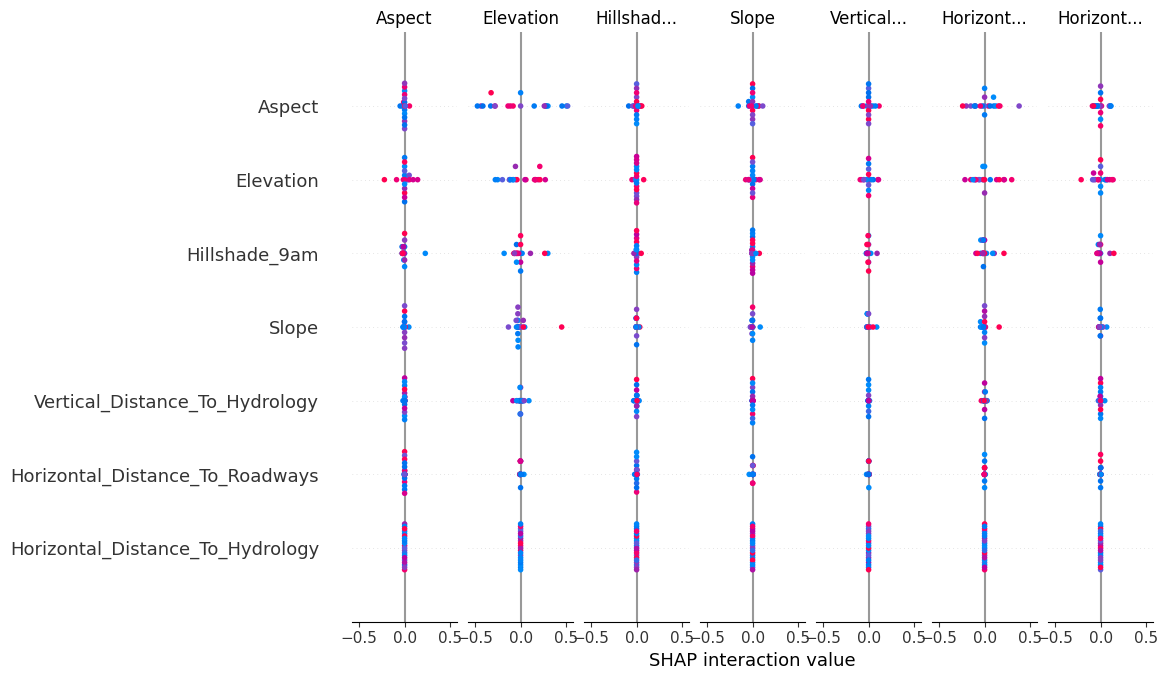

In [8]:
shap.summary_plot(
    shap_values_knn, 
    X_sample_scaled, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_knn,
    X_sample_scaled,
    plot_type="beeswarm"
)

## Neural Network Interpretability

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


  1%|          | 1/100 [00:17<29:33, 17.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


  2%|▏         | 2/100 [00:33<27:29, 16.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  3%|▎         | 3/100 [00:48<25:48, 15.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  4%|▍         | 4/100 [01:03<24:25, 15.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  5%|▌         | 5/100 [01:17<23:53, 15.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  6%|▌         | 6/100 [01:32<23:07, 14.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  7%|▋         | 7/100 [01:45<22:27, 14.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  8%|▊         | 8/100 [01:59<21:47, 14.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  9%|▉         | 9/100 [02:13<21:18, 14.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 10%|█         | 10/100 [02:26<20:55, 13.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 11%|█         | 11/100 [02:40<20:33, 13.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 12%|█▏        | 12/100 [02:54<20:15, 13.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 13%|█▎        | 13/100 [03:07<19:54, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 14%|█▍        | 14/100 [03:21<19:36, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 15%|█▌        | 15/100 [03:35<19:23, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 16%|█▌        | 16/100 [03:48<19:06, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 17%|█▋        | 17/100 [04:02<18:48, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 18%|█▊        | 18/100 [04:16<18:48, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 19%|█▉        | 19/100 [04:29<18:29, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 20%|██        | 20/100 [04:43<18:14, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 21%|██        | 21/100 [04:57<18:01, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 22%|██▏       | 22/100 [05:10<17:44, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 23%|██▎       | 23/100 [05:24<17:28, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 24%|██▍       | 24/100 [05:38<17:17, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 25%|██▌       | 25/100 [05:51<17:01, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 26%|██▌       | 26/100 [06:05<16:57, 13.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 27%|██▋       | 27/100 [06:19<16:39, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 28%|██▊       | 28/100 [06:32<16:23, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 29%|██▉       | 29/100 [06:46<16:08, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 30%|███       | 30/100 [07:00<15:56, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 31%|███       | 31/100 [07:13<15:40, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 32%|███▏      | 32/100 [07:27<15:25, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 33%|███▎      | 33/100 [07:40<15:08, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 34%|███▍      | 34/100 [07:54<14:56, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 35%|███▌      | 35/100 [08:07<14:44, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 36%|███▌      | 36/100 [08:21<14:30, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 37%|███▋      | 37/100 [08:34<14:13, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 38%|███▊      | 38/100 [08:48<14:02, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 39%|███▉      | 39/100 [09:02<13:48, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 40%|████      | 40/100 [09:15<13:32, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 41%|████      | 41/100 [09:29<13:21, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 42%|████▏     | 42/100 [09:42<13:08, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 43%|████▎     | 43/100 [09:56<12:53, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 44%|████▍     | 44/100 [10:10<12:42, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 45%|████▌     | 45/100 [10:23<12:28, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 46%|████▌     | 46/100 [10:37<12:18, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 47%|████▋     | 47/100 [10:51<12:10, 13.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 48%|████▊     | 48/100 [11:05<11:53, 13.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 49%|████▉     | 49/100 [11:18<11:37, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 50%|█████     | 50/100 [11:32<11:23, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 51%|█████     | 51/100 [11:46<11:08, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 52%|█████▏    | 52/100 [11:59<10:53, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 53%|█████▎    | 53/100 [12:13<10:38, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 54%|█████▍    | 54/100 [12:26<10:25, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 55%|█████▌    | 55/100 [12:40<10:10, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 56%|█████▌    | 56/100 [12:53<09:57, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 57%|█████▋    | 57/100 [13:07<09:44, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 58%|█████▊    | 58/100 [13:20<09:28, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 59%|█████▉    | 59/100 [13:34<09:16, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 60%|██████    | 60/100 [13:48<09:03, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 61%|██████    | 61/100 [14:01<08:48, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 62%|██████▏   | 62/100 [14:15<08:34, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 63%|██████▎   | 63/100 [14:28<08:19, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 64%|██████▍   | 64/100 [14:42<08:05, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 65%|██████▌   | 65/100 [14:55<07:53, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 66%|██████▌   | 66/100 [15:09<07:38, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 67%|██████▋   | 67/100 [15:22<07:27, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 68%|██████▊   | 68/100 [15:36<07:16, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 69%|██████▉   | 69/100 [15:50<07:02, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 70%|███████   | 70/100 [16:03<06:47, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 71%|███████   | 71/100 [16:17<06:33, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 72%|███████▏  | 72/100 [16:30<06:18, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 73%|███████▎  | 73/100 [16:43<06:03, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 74%|███████▍  | 74/100 [16:57<05:49, 13.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 75%|███████▌  | 75/100 [17:11<05:43, 13.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 76%|███████▌  | 76/100 [17:25<05:27, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 77%|███████▋  | 77/100 [17:38<05:11, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 78%|███████▊  | 78/100 [17:52<04:58, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 79%|███████▉  | 79/100 [18:05<04:44, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 80%|████████  | 80/100 [18:19<04:30, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 81%|████████  | 81/100 [18:32<04:16, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 82%|████████▏ | 82/100 [18:45<04:02, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 83%|████████▎ | 83/100 [18:59<03:48, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 84%|████████▍ | 84/100 [19:12<03:34, 13.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 85%|████████▌ | 85/100 [19:25<03:20, 13.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 86%|████████▌ | 86/100 [19:39<03:07, 13.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 87%|████████▋ | 87/100 [19:52<02:53, 13.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 88%|████████▊ | 88/100 [20:06<02:40, 13.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 89%|████████▉ | 89/100 [20:19<02:26, 13.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 90%|█████████ | 90/100 [20:32<02:13, 13.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 91%|█████████ | 91/100 [20:46<02:00, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 92%|█████████▏| 92/100 [20:59<01:47, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 93%|█████████▎| 93/100 [21:13<01:33, 13.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 94%|█████████▍| 94/100 [21:26<01:20, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 95%|█████████▌| 95/100 [21:40<01:07, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 96%|█████████▌| 96/100 [21:53<00:53, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 97%|█████████▋| 97/100 [22:07<00:40, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 98%|█████████▊| 98/100 [22:20<00:26, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 99%|█████████▉| 99/100 [22:33<00:13, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


100%|██████████| 100/100 [22:47<00:00, 13.67s/it]


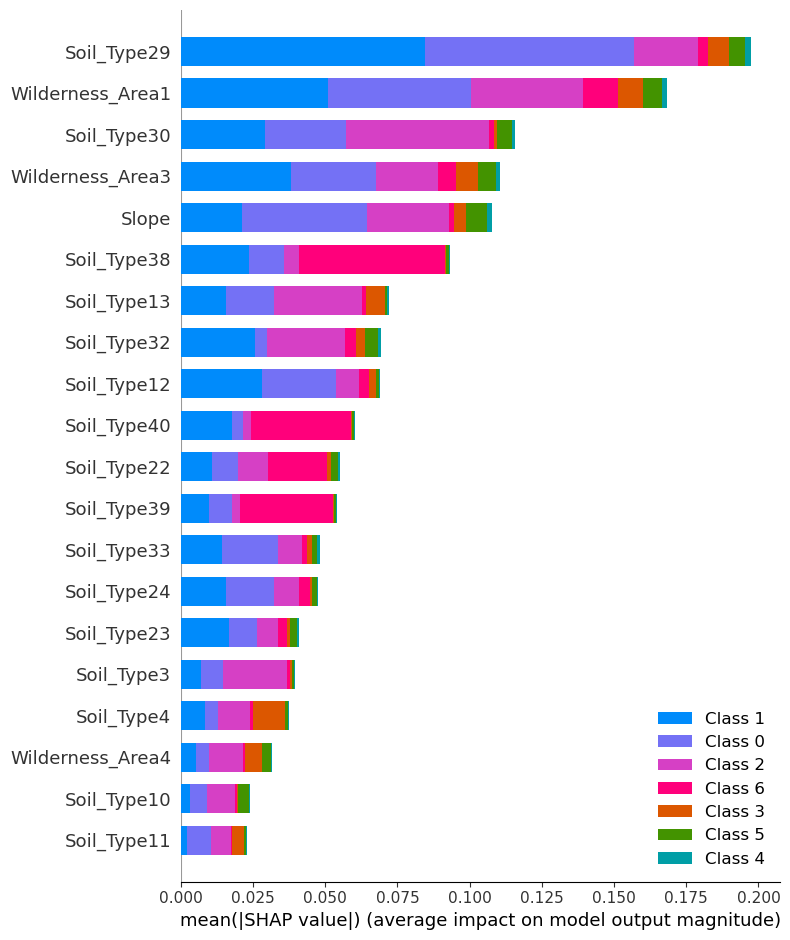

<Figure size 640x480 with 0 Axes>

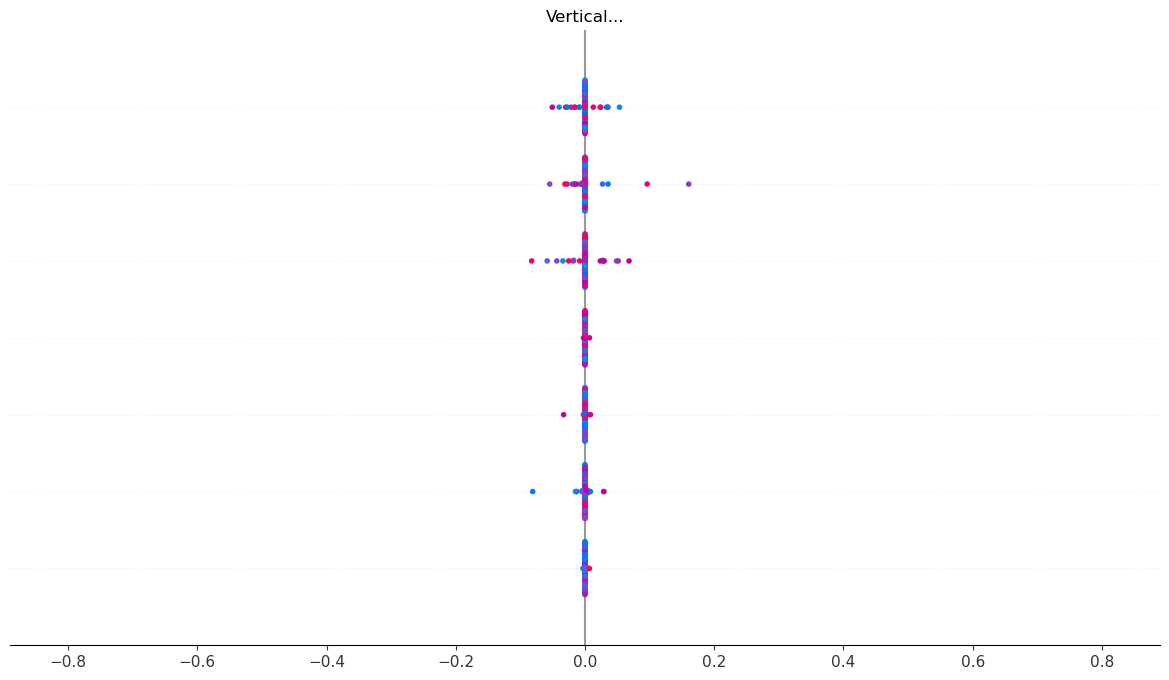

In [7]:
neural_model = load('../data/best_neural_network_no_regs.joblib')
neural_network_explainer = shap.KernelExplainer(neural_model.predict, X_sample_scaled)

shap_values_neural = neural_network_explainer.shap_values(X_sample_scaled)

shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="bar",
)
shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="beeswarm"
)